# Inferential Statistics

## Background

With the increasing prevalence of drug-abuse within the sport of horse racing over the past couple decades, the Thoroughbred Horseracing Integrity Act of 2015 was introduced to monitor and regulate drug usage and administration to American race horses under a national uniform standard. Effective on January 1, 2017, the legislation authorizes the Thoroughbred Horseracing Anti-Doping Authority (THADA) to develop and administer a national anti-doping program. As an independent organization, THADA aims to uphold the integrity of the sport and focus on the welfare of the horses.

The Thoroughbred Horseracing Integrity Act has only been in effect for less than a year at this point, but we hope that the act has been able to make a difference in the sport already. We will be attempting to identify whether any differences in yearly death and breakdown rates are noticeable compared to our previous years of data. We will focus especially on horses with incidents under trainers with a history of doping.

In [200]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns

#import dataset as a dataframe
df = pd.read_csv('Equine_Breakdown_Death_Doping.csv',index_col = 'Unnamed: 0')

# Yearly Death and Breakdown Rate

As we discussed in the exploratory data analysis, the number of horses that have had incidents per year has decreased since 2012. But is this decrease significant? The Thoroughbred Horseracing Integrity Act was enacted on January 1st, 2017, so we will test to see if the 2017 death and breakdown rate is significantly different from the mean of the other years. We only have 9 years worth of data total, so we will be performing a t-test. We do have to keep in mind that the year of 2017 is not yet complete, but we can assume that there most likely won't be many more incidents this year since it's Novermber and therefore off season in New York.

## Yearly Rates - Total (Doping Trainers and Non-Doping Trainers)

### Hypothesis Test

$H_0$: There is no significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016)

$H_A$: There is a significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016)

### Perform t Test

In [201]:
# extract yearly totals
year_total = df.groupby('Year')['Year'].count().reset_index(name='Total')
total_rate_2017 = year_total['Total'].values[8]
total_rate_otheryrs = year_total['Total'][:8]
n1 = len(total_rate_otheryrs)

# print some sample statistics
print(year_total['Total'].describe())
print()
print('Total in 2017:', total_rate_2017)
print('Average total in years 2009-2016:', np.mean(total_rate_otheryrs))

count      9.000000
mean     360.000000
std       92.126272
min      213.000000
25%      295.000000
50%      373.000000
75%      426.000000
max      483.000000
Name: Total, dtype: float64

Total in 2017: 213
Average total in years 2009-2016: 378.375


In [202]:
# calculate t statistic
t1 = ( np.mean(total_rate_otheryrs) - total_rate_2017 ) / ( np.std(total_rate_otheryrs) / np.sqrt(n1) )
print('t =', round(t1,3))

# perform two sided t test
p_t1 = stats.t.sf(abs(t1), n1-1) * 2
print('p = p( t <= ', -round(t1,3), ') + p( t >= ', abs(round(t1,3)), ') = ', round(p_t1,3))
print('p (unrounded) is ', p_t1)

t = 6.337
p = p( t <=  -6.337 ) + p( t >=  6.337 ) =  0.0
p (unrounded) is  0.000390091360871


We have found a very small p value, revealing that we should reject the null hypothesis. There is indeed a statistically significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016). This suggests that the sport really has been improving over the past few years, whether or not it's related to anti-doping legislation.

We do have to keep in mind that we are working with a small dataset. We only have 8 years worth of data (2009-2016) that we are using to calculate a pre-2017 mean. The fact that we still get a very small p value though suggests that the difference is significant.

## Yearly Rates - Total (Doping Trainers)

Now that we know that there's been a significant decrease in the number of deaths and breakdowns per year, let's see if we can discover if it's related to the introduction of anti-doping programs. Has there been a decrease in the number of horses dying and breaking down under trainers with a doping history?

### Hypothesis Test

$H_0$: There is no significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016) for horses trained by trainers with a history of doping

$H_A$: There is a significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016) for horses trained by trainers with a history of doping

### Perform t Test

In [203]:
# extract yearly totals
doping_trainers = df.loc[pd.notnull(df['Year of Action'])]
doped_year_total = doping_trainers.groupby('Year')['Year'].count().reset_index(name='Total')
doped_total_rate_2017 = doped_year_total['Total'].values[8]
doped_total_rate_otheryrs = doped_year_total['Total'][:8]
n2 = len(doped_total_rate_otheryrs)

# print some sample statistics
print(doped_year_total['Total'].describe())
print()
print('Total under doping trainers in 2017:', doped_total_rate_2017)
print('Average total under doping trainers in years 2009-2016:', np.mean(doped_total_rate_otheryrs))

count     9.00000
mean     21.00000
std       8.20061
min       9.00000
25%      15.00000
50%      23.00000
75%      28.00000
max      31.00000
Name: Total, dtype: float64

Total under doping trainers in 2017: 9
Average total under doping trainers in years 2009-2016: 22.5


In [204]:
# calculate t statistic
t2 = ( np.mean(doped_total_rate_otheryrs) - doped_total_rate_2017 ) / ( np.std(doped_total_rate_otheryrs) / np.sqrt(n2) )
print('t =', round(t2,3))

# perform two sided t test
p_t2 = stats.t.sf(abs(t2), 2-1) * 2
print('p = p( t <= ', -round(t2,3), ') + p( t >= ', abs(round(t2,3)), ') = ', round(p_t2,3))
print('p (unrounded) is ', p_t2)

t = 5.57
p = p( t <=  -5.57 ) + p( t >=  5.57 ) =  0.113
p (unrounded) is  0.113096089343


The p value we've calculated does not pass the statistical significance test since it is greater than 0.55. Even if we were testing at the 10% level, our p value would still be too large. We then accept the null hypothesis in this situation. There is no significant difference in the 2017 death and breakdown rate and the average death and breakdown rate of other years (2009 - 2016) for horses trained by trainers with a history of doping. If this is true, is legislation actually making an impact on whether trainers are choosing to drug their horses?

Let's visualize our two sets of data to get an idea of how yearly rates have trended over time.

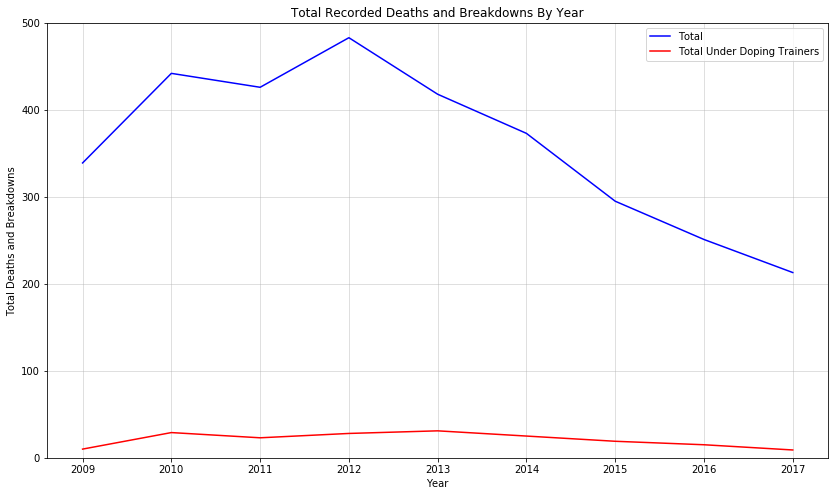

In [205]:
# plot yearly totals and yearly totals under doping trainers
_ = plt.subplots(figsize=(14,8))
_ = plt.plot(year_total['Year'], year_total['Total'], color='blue')
_ = plt.plot(doped_year_total['Year'], doped_year_total['Total'], color='red')
_ = plt.xlabel('Year')
_ = plt.ylabel('Total Deaths and Breakdowns')
_ = plt.title('Total Recorded Deaths and Breakdowns By Year')
_ = plt.legend(('Total', 'Total Under Doping Trainers'))
_ = plt.ylim([0,500])
_ = plt.grid(alpha=.5)
plt.show()

We can see that there are much fewer incidents under trainers with a history of doping. We should keep in mind though that the total under doping trainers could be artificially low in the years 2009 to 2016. There wasn't a standard anti-doping test available yet and restrictions have gotten stricter over the years, so there could be unidentified trainers in that time span that regularly drugged their horses.

Since we've tested the incident rates seperately, we should now test whether the proportional difference is significant. If the rate under doping trainers is decreasing simply because the overall rate is also decreasing, it doesn't really mean that anti-doping rules and regulations are making a difference.

## Proportion of Incidents Under Doping Trainers to Total Incidents

Since we know that both the total yearly incident rate and the yearly incident rate under doping trainers have both been decreasing over the years, we will now test whether the change in the proportion of drugged horses out of the total is significant. We will be comparing two values, so we will perform another t test.

### Hypothesis Test

$H_0$: There is no significant difference in the 2017 proportion of incidents under doping trainers to total incidents and the average proportion of incidents under doping trainers to total incidents of other years (2009 - 2016)

$H_A$: There is a significant difference in the 2017 proportion of incidents under doping trainers to total incidents and the average proportion of incidents under doping trainers to total incidents of other years (2009 - 2016)

### Perform t Test

In [206]:
# calculate and extract yearly proportion totals
doping_proportion = doped_year_total / year_total * 100
doping_proportion['Year'] = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
doping_proportion_2017 = doping_proportion['Total'].values[8]
doping_proportion_otheryrs = doping_proportion['Total'][:8]
n3 = len(total_rate_otheryrs)

# print some sample statistics
print(doping_proportion['Total'].describe())
print()
print('Proportion in 2017:', doping_proportion_2017)
print('Average proportion in years 2009-2016:', np.mean(doping_proportion_otheryrs))

count    9.000000
mean     5.718656
std      1.376203
min      2.949853
25%      5.399061
50%      5.976096
75%      6.561086
max      7.416268
Name: Total, dtype: float64

Proportion in 2017: 4.22535211268
Average proportion in years 2009-2016: 5.905319419651566


In [207]:
# calculate t statistic
t3 = ( np.mean(doping_proportion_otheryrs) - doping_proportion_2017 ) / ( np.std(doping_proportion_otheryrs) / np.sqrt(n3) )
print('t =', round(t3,3))

# perform two sided t test
p_t3 = stats.t.sf(abs(t3), n3-1) * 2
print('p = p( t <= ', -round(t3,3), ') + p( t >= ', abs(round(t3,3)), ') = ', round(p_t3,3))
print('p (unrounded) is ', p_t3)

t = 3.78
p = p( t <=  -3.78 ) + p( t >=  3.78 ) =  0.007
p (unrounded) is  0.00689400099676


Our small p value suggests that there is a statistically significant difference in the 2017 proportion of incidents under doping trainers to total incidents and the average proportion of incidents under doping trainers to total incidents of other years (2009 - 2016). 

# Conclusions

Though we didn't find the decrease of the 2017 incident rate under doping trainers compared to other years to be significant, we still identified statistical significance in our two other tests. The significant decrease in the proportion of incidents under doping trainers in 2017 compared to the average proportion  of indicents under doping trainers for the previous eight years suggests that legislation and regulations could be making a difference in whether trainers choose to drug their horses. With the development of more robust anti-doping tests and more stringent rules, hopefully the number of deaths and breakdowns per year will continue to decrease and the racetrack can return to being a level playing field for all participants.